# 2023/24-XAI-LABS
Note that this lab has three levels: basic, regular and advanced.\
Doing the **basic** part earns you a grade of 5.5-6.0.\
Doing the **regular** part earns you a max grade of 8.\
Doing the **advanced** part earns you a max grade of 10.0.

Please return a Jupyter notebook as a submission in Canvas, to make the grading easier for us.

**Group No:** 9

**Student Name**: Wan Barmawi Muhammad Razaq S2819201

**Student Name**: Hakan Tirsi S3105555


# Lecture 3
The following set of exercises are related to the Lecture 3.
## Adversarial Attack Simulation
Neural Networks are generally not robust and can be fooled easily. You will create adversarial examples using techniques like the Fast Gradient Sign Method (FGSM) and test these against a pretrained model to observe how the predictions change.

### (Basic)Exercise 1
For the basic part of this exercise you can use the starting code from [here](https://www.tensorflow.org/tutorials/generative/adversarial_fgsm). The task is to use a different image and come up with smallest value of epsilon that completely change the prediction of the model.



In [31]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [32]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [33]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [34]:
'''
Adversarial Example Done with ZEBRA

image_path = "LecThreeAdditionalInfo/Zebra.jpg"
image_raw = tf.io.read_file(image_path)

# Convert Raw image into proper string or (tensor) arraw
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)
'''


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


In [43]:
# Adversarial Example Done with GoldFish

image_path = "LecThreeAdditionalInfo/Goldfish.jpeg"
image_raw = tf.io.read_file(image_path)

# Convert Raw image into proper string or (tensor) arraw
image = tf.image.decode_image(image_raw)
image = preprocess(image)
image_probs = pretrained_model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


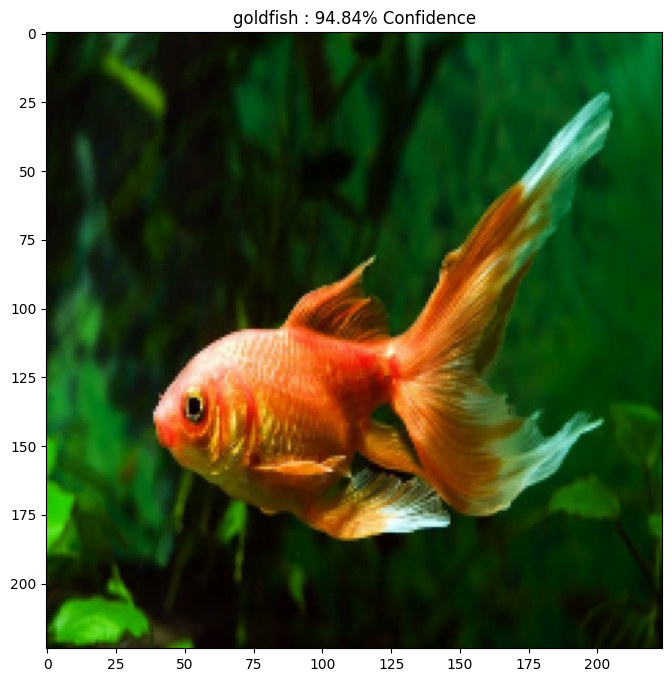

In [44]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

#### Creating adversarial image

In [45]:
loss_object = tf.keras.losses.CategoricalCrossentropy() #loss function for multi-classes

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    #tf.GradientTape() used to compute gradients of a function.

    #We instruct to watch to an image
    #i.e. watch --> Compute gradients with respect to this tensor
    tape.watch(input_image) 
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [37]:

#Adversarial Example Done with ZEBRA
'''
# Get the input label of the image.
zebra_retriever_index = 340 #https://gist.github.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57
label = tf.one_hot(zebra_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
#plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]
'''

In [48]:
#Adversarial Example Done with Goldfish

# Get the input label of the image.
goldfish_retriever_index = 340 #https://gist.github.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57
label = tf.one_hot(goldfish_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
#plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [49]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


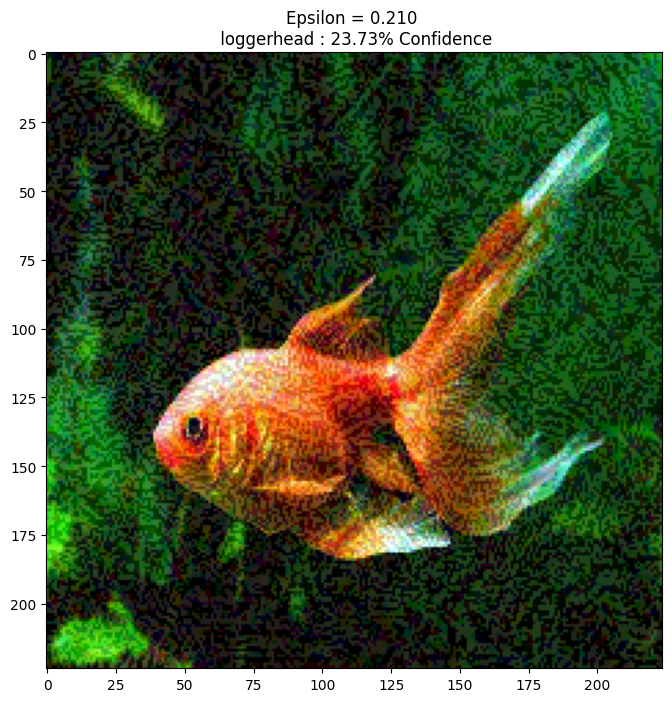

In [51]:
rangeList = range(0, 100, 1)
epsilons = [x/100 for x in rangeList]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input') for eps in epsilons]

'''
Note
By iteriating through different values of epsilons, we can observe of different values of perturbation affects the model 
'''

index = 0
while index < len(epsilons): #Ensuring we are not going outside our boundary
    adv_x = image + epsilons[index] * perturbations #Creating the advisary image by multiplying the epsilons * 
    adv_x = tf.clip_by_value(adv_x, -1, 1) #Ensuring the pixel values remain within the valid range
    _, label, confidence = get_imagenet_label(pretrained_model.predict(adv_x))
    if label != "goldfish": #Find the first label that is not equal to a goldfish and break the loop.
        display_images(adv_x, descriptions[index])
        break
    index += 1

### (Advanced) Exercise 2
Train your own neural network and make it robust against such attack specifically against FGSM.

To make our NN robust against such attacks, we will train our models with L2 regularization techniques.

In [40]:
# Your code here

## Compare Pixel Attribution Methods
Apply Saliency Maps, CAM, Grad-CAM, and SmoothGrad to a set of images and analyze the quality of the explanations provided by each method. Write a report discussing the strengths and weaknesses of each technique based on your observations.

### (Basic) Exercise 3 

Implement the following techniques, you can use the existing implementaion availabe as a package ominixai. You are expected to compare the following methods:

Saliency Maps: Implement a function to compute the saliency map.

CAM: Implement a function to compute CAM.

Grad-CAM: Implement a function to compute Grad-CAM.

SmoothGrad: Implement a function to compute SmoothGrad.

In [29]:
# Saliency Map

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load and preprocess the input image
img_path = "Input-Image-Pixel-Attribution/hummingbird.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Convert to TensorFlow tensor
x = tf.convert_to_tensor(x)


1/1 [==============================] - 1s 619ms/step
Saliency map computed successfully.
1/1 [==============================] - 0s 395ms/step
Saliency map computed successfully.


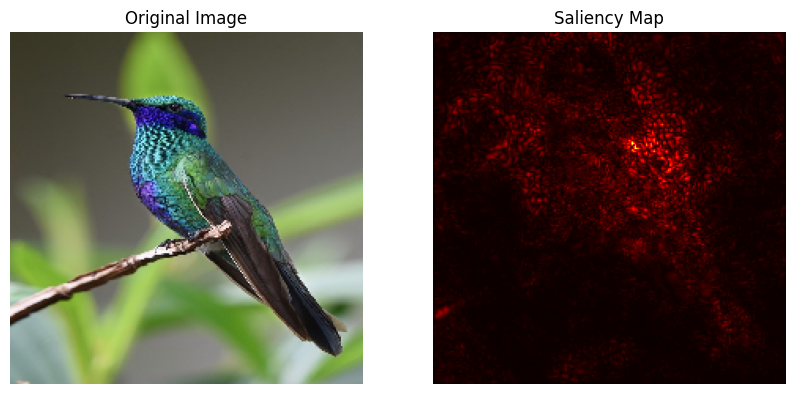

In [30]:
def compute_saliency_map(model, img_path):
    # Load and preprocess the input image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Convert to TensorFlow tensor
    x = tf.convert_to_tensor(x)

    # Forward pass: Get the model's prediction
    preds = model.predict(x)
    predicted_class = np.argmax(preds[0])
    
    # Compute gradients: Gradient of the predicted class score with respect to the input image
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)
        class_score = predictions[0][predicted_class]
    
    grads = tape.gradient(class_score, x)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1).numpy()[0] # absolute value of the gradient
    
    # Normalize the saliency map, range [0,1]
    saliency = (saliency - np.min(saliency)) / (np.max(saliency) - np.min(saliency))
    
    return x, saliency

# Compute saliency map
x, saliency_map = compute_saliency_map(model, img_path)
print("Saliency map computed successfully.")

# Compute saliency map
x, saliency_map = compute_saliency_map(model, img_path)
print("Saliency map computed successfully.")

# Display the original image and the saliency map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image.load_img(img_path, target_size=(224, 224)))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='hot')
plt.title('Saliency Map')
plt.axis('off')

plt.show()


In [26]:
# Class Activation Map (CAM)

import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer and a new dense layer with softmax activation
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1000, activation='softmax', name='final_dense')(x)

# Create the modified model
model = Model(inputs=base_model.input, outputs=predictions)

# Print model summary to verify
model.summary()

# Prepare the input image
img_path = "Input-Image-Pixel-Attribution/hummingbird.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

1/1 [==============================] - 0s 378ms/step
CAM computed successfully.


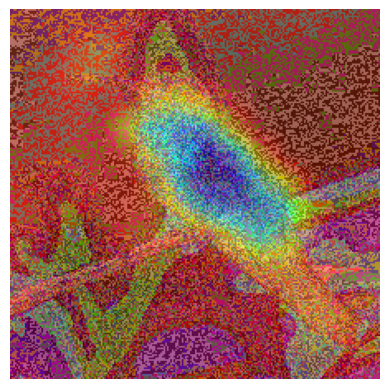

In [27]:
def compute_cam_vgg16(model, img):
    # Get the feature maps from the last convolutional layer
    last_conv_layer = model.get_layer("block5_conv3")
    model_with_conv_output = Model(inputs=model.inputs, outputs=last_conv_layer.output)
    
    # Compute the feature maps
    feature_maps = model_with_conv_output.predict(img)
    
    # Get the class index of the predicted class
    class_idx = np.argmax(model.predict(img)[0])
    
    # Get the weights of the final dense layer
    final_dense_layer = model.get_layer("final_dense")
    final_weights = final_dense_layer.get_weights()[0]
    
    # We need to use the weights for the predicted class
    class_weights = final_weights[:, class_idx]

    # Compute the class activation map (CAM)
    cam = np.dot(feature_maps[0], class_weights)

    # Apply ReLU to the CAM
    cam = np.maximum(cam, 0)
    
    # Normalize the CAM
    cam = (cam - cam.min()) / (cam.max() - cam.min())
    
    # Resize the CAM to the size of the input image
    cam = cv2.resize(cam, (img.shape[2], img.shape[1]))
    
    # Convert the CAM to RGB
    cam = np.uint8(255 * cam)
    cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    
    # Overlay the CAM on the original image
    img = np.squeeze(img, axis=0)
    img = np.uint8(255 * ((img + 1) / 2))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    overlay = cv2.addWeighted(img, 0.6, cam, 0.4, 0)
    
    return overlay

# Compute CAM
cam_map = compute_cam_vgg16(model, x)
print("CAM computed successfully.")

# Display the CAM
plt.imshow(cam_map)
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 1s/step
Class index: 94
Last convolutional layer: block5_conv3
Gradients computed.
Pooled gradients shape: (512,)
Heatmap shape before ReLU: (14, 14)
ReLU applied to heatmap.
Heatmap shape after normalization: (14, 14)
Heatmap resized and color mapped.
Overlay created.


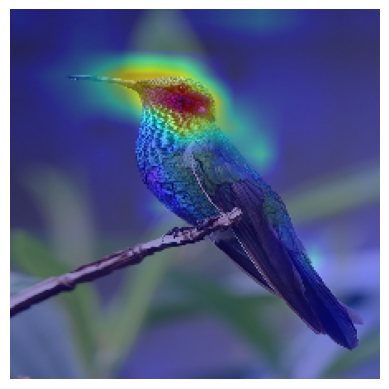

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import cv2

# Function to compute Grad-CAM
def compute_grad_cam(model, img_path, preprocess_function):
    # Step 1: Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_function(x)

    # Step 2: Forward pass: Get the predictions
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    print(f"Class index: {class_idx}")

    # Step 3: Get the last convolutional layer
    last_conv_layer = model.get_layer("block5_conv3")
    print(f"Last convolutional layer: {last_conv_layer.name}")

    # Step 4: Create a model that maps the input image to the activations of the last conv layer and the output predictions
    model_with_conv_output = Model(inputs=model.inputs, outputs=[last_conv_layer.output, model.output])

    # Step 5: Get the gradient of the class output with respect to the last conv layer output
    with tf.GradientTape() as tape:
        conv_output, predictions = model_with_conv_output(x)
        loss = predictions[:, class_idx]
        grads = tape.gradient(loss, conv_output)

    # Step 6: Check if grads is not None
    if grads is None:
        raise ValueError("Gradients are None, which indicates an issue with the gradient computation.")
    
    print("Gradients computed.")

    # Step 7: Compute the average of the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    print(f"Pooled gradients shape: {pooled_grads.shape}")

    # Step 8: Weight the feature map with the gradients
    conv_output = conv_output[0]
    heatmap = conv_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    print(f"Heatmap shape before ReLU: {heatmap.shape}")

    # Step 9: Apply ReLU to the heatmap
    heatmap = tf.maximum(heatmap, 0)
    print("ReLU applied to heatmap.")

    # Step 10: Normalize the heatmap
    heatmap /= tf.reduce_max(heatmap)
    heatmap = heatmap.numpy()
    print(f"Heatmap shape after normalization: {heatmap.shape}")

    # Step 11: Resize the heatmap to the size of the input image
    heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))

    # Step 12: Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    print("Heatmap resized and color mapped.")

    # Step 13: Overlay the heatmap on the original image
    img_bgr = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    overlay = cv2.addWeighted(img_bgr, 0.6, heatmap, 0.4, 0)
    print("Overlay created.")

    return overlay

# Example usage
img_path = "Input-Image-Pixel-Attribution/hummingbird.jpeg" 
model = VGG16(weights='imagenet')

grad_cam_overlay = compute_grad_cam(model, img_path, preprocess_input)

# Display the image
plt.imshow(cv2.cvtColor(grad_cam_overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 816ms/step
Class index: 94
Iteration 1, Sum of gradients: 0.003209084039554
Iteration 2, Sum of gradients: 0.00294937239959836
Iteration 3, Sum of gradients: 0.0021580634638667107
Iteration 4, Sum of gradients: 0.002722142729908228
Iteration 5, Sum of gradients: -0.0007525174878537655
Iteration 6, Sum of gradients: 0.0019301134161651134
Iteration 7, Sum of gradients: 0.004454425536096096
Iteration 8, Sum of gradients: 0.0035617139656096697
Iteration 9, Sum of gradients: 0.003445982001721859
Iteration 10, Sum of gradients: 0.00278646731749177
Iteration 11, Sum of gradients: 0.004530304577201605
Iteration 12, Sum of gradients: 0.000402244389988482
Iteration 13, Sum of gradients: 0.004742853343486786
Iteration 14, Sum of gradients: 0.0013696986716240644
Iteration 15, Sum of gradients: 0.0021524098701775074
Iteration 16, Sum of gradients: 0.004149782005697489
Iteration 17, Sum of gradients: 0.0037316051311790943
Iteration 18, Sum of gradients: 0.00

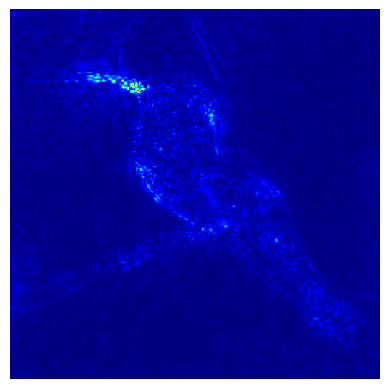

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Function to add noise to the image
def add_noise(img, noise_level):
    noise = np.random.normal(0, noise_level, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255)
    return noisy_img

# Function to compute gradients
def compute_gradients(model, img, class_idx):
    with tf.GradientTape() as tape:
        img = tf.convert_to_tensor(img, dtype=tf.float32)
        tape.watch(img)
        preds = model(img)
        class_output = preds[:, class_idx]
    grads = tape.gradient(class_output, img)
    return grads

# Function to compute SmoothGrad
def compute_smooth_grad(model, img_path, preprocess_function, noise_level=25, num_samples=50):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_function(x)

    # Forward pass: Get the predictions
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    print(f"Class index: {class_idx}")

    # Initialize the smooth gradient
    smooth_grad = np.zeros_like(x)

    # Generate noisy images and compute gradients
    for i in range(num_samples):
        noisy_img = add_noise(x, noise_level)
        grads = compute_gradients(model, noisy_img, class_idx)
        smooth_grad += grads

        # Debugging: print the sum of gradients to ensure they are being computed
        print(f"Iteration {i+1}, Sum of gradients: {np.sum(grads)}")

    # Average the gradients
    smooth_grad /= num_samples

    # Process the gradients for visualization
    smooth_grad = np.abs(smooth_grad).mean(axis=-1)[0]

    # Debugging: print the range of smooth_grad values
    print(f"SmoothGrad min value: {np.min(smooth_grad)}, max value: {np.max(smooth_grad)}")

    return smooth_grad

# Example usage
img_path = "Input-Image-Pixel-Attribution/hummingbird.jpeg"  # Use the uploaded file path
model = VGG16(weights='imagenet')

smooth_grad_map = compute_smooth_grad(model, img_path, preprocess_input)
print("SmoothGrad computed successfully.")

# Display the SmoothGrad
plt.imshow(smooth_grad_map, cmap='jet')
plt.axis('off')
plt.show()


### (Regular) Exercise 4
Create a function to display the original image alongside the saliency map, CAM, Grad-CAM, and SmoothGrad visualizations for comparison. Display the visualizations for each image. Analysis

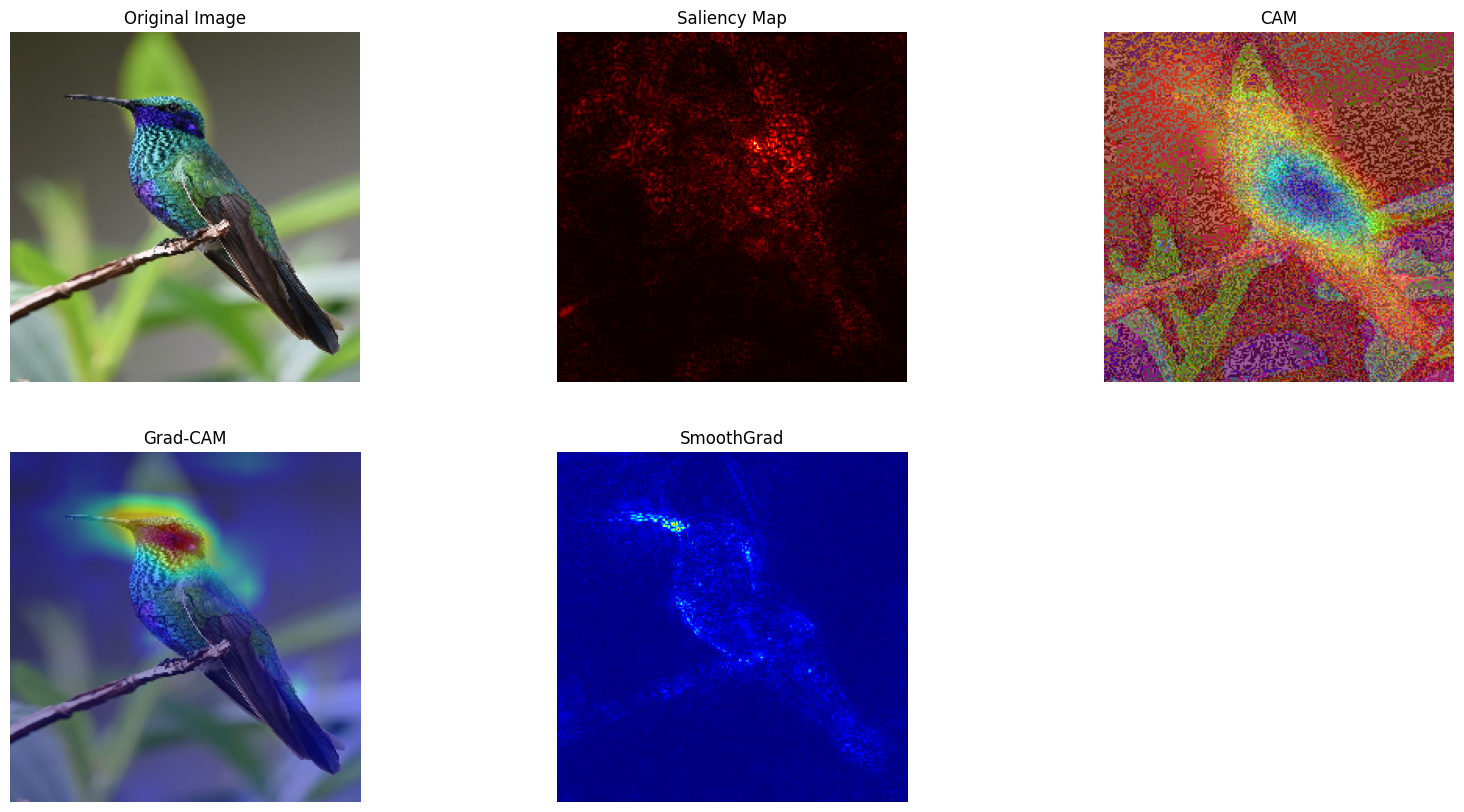

In [21]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.vgg16 import preprocess_input

# Function to display all visualizations
def display_all_visualizations(original_img, saliency_map, cam_map, grad_cam_overlay, smooth_grad_map):
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(saliency_map, cmap='hot')
    plt.title('Saliency Map')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(cam_map)
    plt.title('CAM')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(grad_cam_overlay, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(smooth_grad_map, cmap='jet')
    plt.title('SmoothGrad')
    plt.axis('off')

    plt.show()

# Prepare the input image
img_path = "Input-Image-Pixel-Attribution/hummingbird.jpeg"
original_img = image.load_img(img_path, target_size=(224, 224))

# Assuming saliency_map, cam_map, grad_cam_overlay, and smooth_grad_map are already computed
# For the purpose of this example, I'll assume they are already defined in your environment

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')


# Display all visualizations
display_all_visualizations(original_img, saliency_map, cam_map, grad_cam_overlay, smooth_grad_map)


### (Regular) Exercise 5
Compare the results. Some points to look for are:


Which technique provides the most intuitive explanation. The strengths and weaknesses of each technique. Any observed differences in the explanations across different images.

### Answer

Based on the visualizations, we would say that Grad-CAM provides the most intuitive explaination. In terms of localization, grad-CAM clearly highlights the bird's head and upper body, which are likly the most distinguishing features for classifyi9ng the humming bird. Also, the heatmap produced by Grad-CAM is overlaid on the original image. This make it easiesr to see which parts of the image the model is focusing on.


### Saliency Map

Strength
- Provides pixel-level importance for the prediction
- Easier to compute because the computation only involves calculating the gradient of the output with respect to the input image

Weaknesses
- Often noisy and difficult to interpret, particularly when dealing with complex images.
- Prone to the saturation problem because of the use of ReLU activations.

### Class Activation Mapping (CAM)

Strenght
- Provides a coarse localization map that highlight the important regions for classification
- More intivuive so that it will be easier to understand

Weaknesses
- Requires to modify the network architecture and retraining it.
- Can only be applied to CNN architecture

## Grad-CAM

Strenght
- Offer a localization map without the need to modify the network architecture
- Can be applied to any CNN-based model.
- More detailed than CAM as it uses gradients to weigh the feature maps.

Weaknesses
- Still depends on the gradient, which might be noisy and unstable

## SmoothGrad

Strenght
- Try to reduce noise and provide a smoother and easier to interpret map.
- Enhances gradient-based explanations.

Weaknesses
- More expensive in terms of computation becausse of multiple forward and backward passes.
- still relies on gradients, which might be unstable.

## Observe differences in the explanations.

1. Object Complexity:
in case of object with high complex background or multiple object, Grad-CAM and SmoothGrad tend to provide clearer and more focused explanations compared to saliency maps and CAM. For example, for an image with multiple birds, GradCAM  could highlight the specific bird, whereas salience map might show noise around all birds.

## XAI For text Data
## (Advanced) Exercise 6
In this exercise you will work with text data. The only thing you have to do is to follow the steps of this [tuotorial](https://eli5.readthedocs.io/en/latest/tutorials/sklearn-text.html) and apply it to  a different dataset.

## DeepSHAP (DeepLift)


In [41]:
# imports for a deep learning model
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np

ModuleNotFoundError: No module named 'torch'

### (Regular)Exercise 7
Use the shap library and the provided starter code to explain the MNIST data set.

In [ ]:
# Train your own NN
# Use Shap
# display result

Used Resources
https://www.tensorflow.org/datasets/catalog/mnist
https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python
https://colab.research.google.com/github/Deep-Learning-Challenge/challenge-notebooks/blob/master/2.Convolutional%20Neural%20Networks/2.Guided%20Projects/1.Handwritten%20Digit%20Recognition.ipynb



In [69]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [71]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

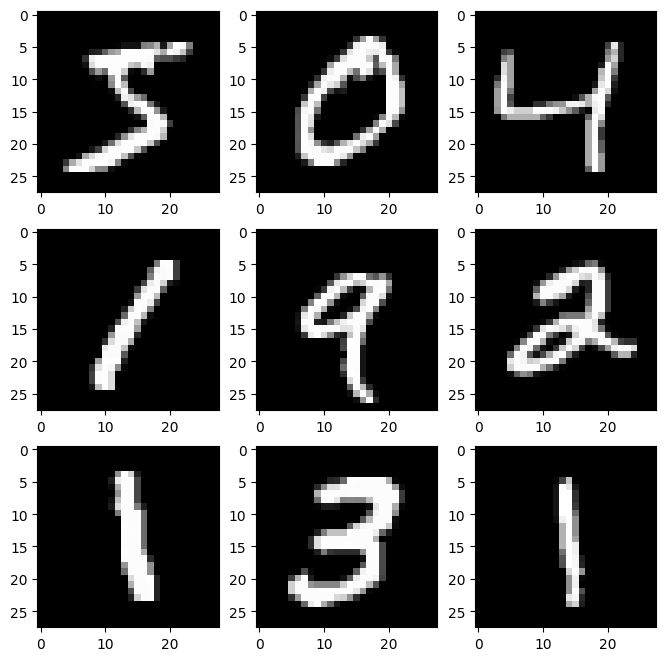

In [72]:
for i in range(9):
    plt.subplot(330 + 1 + i) #A number of rows in the grid, B = number of columns in the grid, C =index of the subplot within the grid
    plt.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    plt.show

#### Implementing a basic NN

In [73]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils

In [74]:
seed = 7
numpy.random.seed(seed)

In [75]:
# flatten the images 28X28 to a vector by 784. THis is needed because our NN only accepts a 1D Vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [76]:
X_train = X_train / 255
X_test = X_test / 255

In [77]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [78]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [79]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10


c:\Users\Hakan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 - 4s - 13ms/step - accuracy: 0.9197 - loss: 0.2826 - val_accuracy: 0.9593 - val_loss: 0.1387
Epoch 2/10
300/300 - 3s - 8ms/step - accuracy: 0.9676 - loss: 0.1132 - val_accuracy: 0.9728 - val_loss: 0.0914
Epoch 3/10
300/300 - 3s - 8ms/step - accuracy: 0.9796 - loss: 0.0715 - val_accuracy: 0.9752 - val_loss: 0.0790
Epoch 4/10
300/300 - 2s - 8ms/step - accuracy: 0.9854 - loss: 0.0508 - val_accuracy: 0.9788 - val_loss: 0.0702
Epoch 5/10
300/300 - 2s - 8ms/step - accuracy: 0.9899 - loss: 0.0371 - val_accuracy: 0.9785 - val_loss: 0.0675
Epoch 6/10
300/300 - 3s - 9ms/step - accuracy: 0.9929 - loss: 0.0270 - val_accuracy: 0.9803 - val_loss: 0.0607
Epoch 7/10
300/300 - 3s - 9ms/step - accuracy: 0.9950 - loss: 0.0202 - val_accuracy: 0.9789 - val_loss: 0.0652
Epoch 8/10
300/300 - 3s - 9ms/step - accuracy: 0.9963 - loss: 0.0154 - val_accuracy: 0.9812 - val_loss: 0.0606
Epoch 9/10
300/300 - 3s - 9ms/step - accuracy: 0.9980 - loss: 0.0105 - val_accuracy: 0.9803 - val_loss: 0.0646
Epoch 10/10

### (Regular) Exercise 8
Explain what can be understood about the similarity of certain digits as seen by the machine learning model through the explanations.